In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Lotka–Volterra equations
$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cx + dxy$

$\frac{dx}{dt}$ and $\frac{dy}{dt}$ represent the instantaneous growth rates of the two populations;

a, b, c and are positive real parameters describing the interaction of the two species.


## Solving system of ODE's

In [2]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
    return [dxdt, dydt]

In [3]:
sample_data = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)
t = np.linspace(0, 15, 50)

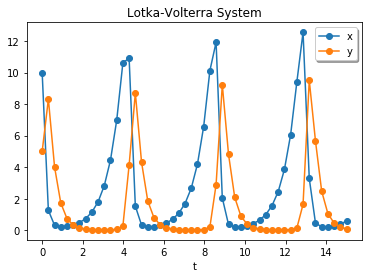

In [4]:
plt.plot(t, sample_data.sol(t).T, "o-")
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

## Fitting system of ODE

Sample datas are taking from previously solved values

In [16]:
prey, predator = sample_data.sol(t)
experiment = {"time":t, "prey":prey, "predator":predator, "data":np.append(prey, predator)}
# initial condition
y0 = [experiment["prey"][0], experiment["predator"][0]]

# simulation time
tspan = [0, 15] # from t=0 to t=1

solve_method = "LSODA"


In [18]:
def fitfunc(t, a, b, c, d):

    def diffEq(t, z):
        x, y = z
        dxdt = a*x - b*x*y
        dydt = -c*y + d*x*y
        return [dxdt, dydt]
    
    results = solve_ivp(diffEq, tspan, y0, dense_output=True, method=solve_method)

    y = results.sol(t)
    y = y.reshape(y.size,)
    return y

fitted_params: [1.20219178 0.96692728 3.07056832 1.12342321], fitted_err: [0.31294819 0.33581899 0.54627337 0.10704236]


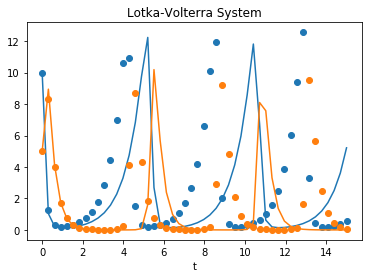

In [22]:
# a = 1.5, b = 1, c = 3, d = 1
init_guess = [1.2, 1, 2.9, 1]
fitted_params, fitted_covariences = curve_fit(fitfunc, experiment["time"], experiment["data"], p0=init_guess)
fitted_err = np.sqrt(np.diag(fitted_covariences))
print(f"fitted_params: {fitted_params}, fitted_err: {fitted_err}")

fitted = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=fitted_params, dense_output=True, method=solve_method)

fig, ax = plt.subplots()
for i in range(2):
    ax.plot(t, sample_data.sol(t)[i], f"C{i}o")
    ax.plot(t, fitted.sol(t)[i], f"C{i}-")


plt.xlabel('t')
plt.title('Lotka-Volterra System')
plt.show()
